# Predicting Employee Churn 
Prepared by Nick Freeman, PhD.

This notebook considers the problem of predicting employee churn for the purpose of demonstrating several machine learning techniques in Python. Employee churn refers to the turnover in an organization's staff as existing employees leave and new ones are hired. The churn rate is typically calculates as the percent of employees leaving the company over some specified time period. Although some staff turnover is inevitable, a high rate of churn is costly because of the associated costs of hiring and training. Moreover, it can take several months for a new hire to acclimate to a new position, and longer before the company realizes any return on their hiring investments. If an organization can predict the attributes that may cause an employee to leave, interventions may be planned to reduce churn.

The following code block imports some libraries that we will use for our analysis.

In [1]:
import pandas as pd 
import numpy as np
import ML_Demo_Script as mld
from ipywidgets import interact

We assume that the company has historical data that was gathered from employee surveys. The data (which was modified from that used in the tutorial available at https://www.datacamp.com/community/tutorials/predicting-employee-churn-python) includes the following fields:

- `satisfaction_level`: the employee's reported satisfaction with their job (ranges from 0 to 100),
- `last_evaluation`: the employee's last performance evaluation score, (ranges from 0 to 100),
- `number_of_projects`: the number of projects assigned to the employee,
- `average_monthly_hours`: average number of hours worked by the employee during a month,
- `years_with_company`: the number of years the employee has been with the company,
- `involved_in_accident`: 0 or 1 (no or yes) to indicate whether or not the employee has been involved in an accident at work,
- `promoted_last_5_years`: 0 or 1 (no or yes) to indicate whether or not the employee was promoted within the lat 5 years,
- `department`: the employee's working department/division.
- `salary_level`: the employee's salary level (low, medium, or high),
- `left_company`: 0 or 1 (no or yes) to indicate whether or not the employee left the company.

The following code block reads in the data, stores the data in a Pandas `DataFrame` object named `data`, and prints the first 5 rows of the `data` object.

In [2]:
data = pd.read_csv('data/HR_comma_sep.csv')
data.head(10)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_with_company,involved_in_accident,left_company,promoted_last_5_years,department,salary_level
0,38.0,53.0,2,157,3,0,1,0,sales,low
1,80.0,86.0,5,262,6,0,1,0,sales,medium
2,11.0,88.0,7,272,4,0,1,0,sales,medium
3,72.0,87.0,5,223,5,0,1,0,sales,low
4,37.0,52.0,2,159,3,0,1,0,sales,low
5,41.0,50.0,2,153,3,0,1,0,sales,low
6,10.0,77.0,6,247,4,0,1,0,sales,low
7,92.0,85.0,5,259,5,0,1,0,sales,low
8,89.0,100.0,5,224,5,0,1,0,sales,low
9,42.0,53.0,2,142,3,0,1,0,sales,low


The following code block shows that our dataset includes almost 15,000 instances.

In [3]:
data.shape

(14999, 10)

We are interested in developing models that can correctly predict values in the `left_company` column. The following code block defines an interactive plot that allows you to easily investigate differences in the number of employees that stay or leave as the various attributes vary.

In [4]:
attribute_columns = ['satisfaction_level', 'last_evaluation', 'number_of_projects',
                     'average_monthly_hours', 'years_with_company', 'involved_in_accident', 'promoted_last_5_years', 'department', 'salary_level']

@interact(attribute = attribute_columns)

def interactive_visual(attribute = attribute_columns[0]):
    
    mld.plot_for_interactive_vis(data, attribute)

interactive(children=(Dropdown(description='attribute', options=('satisfaction_level', 'last_evaluation', 'num…

The following code block allows you to view the feature values associated with a subset of the instance and attempt to predict the whether or not the employee left the company.

In [5]:
features = ['satisfaction_level', 'last_evaluation', 'number_of_projects',
            'average_monthly_hours', 'years_with_company', 'involved_in_accident',
            'promoted_last_5_years', 'department', 'salary_level']

target = 'left_company'

instances = [10368, 12440, 11068, 1311,  14985]
show_left = [False, True]

@interact(instance = instances, answer = show_left)

def interactive_instance_view(instance = instances[0], answer = show_left[0]):
    
    mld.print_instances_from_data(data, features, instance, answer)

interactive(children=(Dropdown(description='instance', options=(10368, 12440, 11068, 1311, 14985), value=10368…

We will now turn our attention to preparing the data for our machine learning analysis. The machine learning algorithms that we will consider require numerical input data. Therefore, we need to develop a numerical representation for the categorical data contained in the `department` and `salary_level` columns. The following code block uses Pandas `get_dummies()` method for `DataFrame` objects to generate a binary representation for these columns. This conversion is commonly referred to as *one hot encoding*.

In [6]:
data = mld.data_prep(data)

data.head(25)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_with_company,involved_in_accident,left_company,promoted_last_5_years,department,salary_level,...,hr,management,marketing,product_mng,sales,support,technical,salary_high,salary_low,salary_medium
0,38.0,53.0,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,80.0,86.0,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,11.0,88.0,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,72.0,87.0,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,37.0,52.0,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
5,41.0,50.0,2,153,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
6,10.0,77.0,6,247,4,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
7,92.0,85.0,5,259,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
8,89.0,100.0,5,224,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
9,42.0,53.0,2,142,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


The following code block specifies the set of columns in the `data` object that we will pass to our machine learning algorithms as features. The machine learning algorithms that we consider will attempt to learn patterns of these features that explain variation in the target variable, which for our problem is the value in the `left_company` column. We then split the dataset into two parts, training and testing datasets. The machine learning algorithms will use the training dataset when learning the patterns of features that affect the target. The testing dataset will be used to investigate the accuracy of the learned models. We specify that 70% of the data be used for training and the remianing 30% be used for testing.

After splitting the data into training and testing sets, the `fit_models` function that fits several popular machine learning models to the training dataset. The function plots a model comparison that shows the accuracy of the models fit to the data. The function also returns the name of the best model, an object that contains the model fit, and the predictions for the test dataset

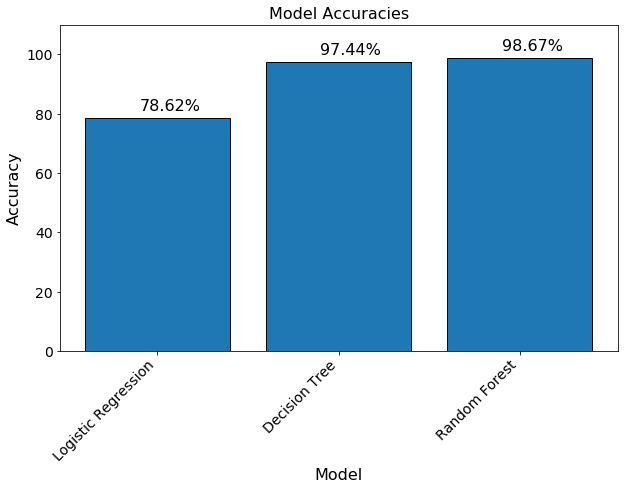

In [7]:
features = ['satisfaction_level', 'last_evaluation', 'number_of_projects',
            'average_monthly_hours', 'years_with_company', 'involved_in_accident',
            'promoted_last_5_years', 'IT', 'RandD', 'accounting', 
            'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical',
            'salary_high', 'salary_low', 'salary_medium']

target = 'left_company'

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    data[target], 
                                                    test_size=0.3, 
                                                    random_state=42)

best_model_name, best_model, predictions = mld.fit_models(X_train, y_train, X_test, y_test)

The following code block uses our function to generate the confusion matrix for the model offering the highest accuracy. 

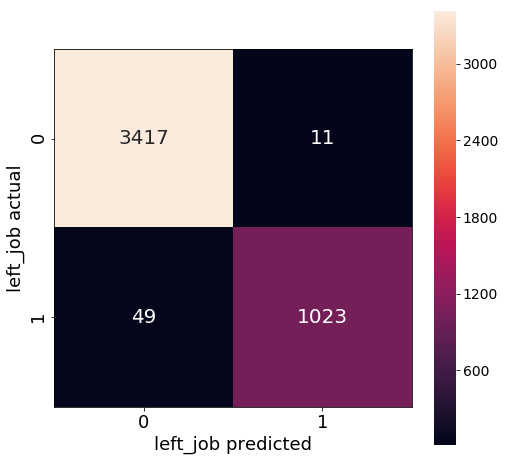

In [8]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)

mld.plot_confusion_matrix(cm)

# Can you beat the best model?

The following code block allows you to specify an integer between 0 and 4499, where each value corresponds to a particular instance in the testing dataset. Running the cell will print the feature values for for the specified instance. Using this data, along with the previous plot, you can determine your prediction for whether the associated employee stayed with the company or left.

In [9]:
attribute_columns = ['satisfaction_level', 'last_evaluation', 'number_of_projects',
                     'average_monthly_hours', 'years_with_company', 'involved_in_accident', 'promoted_last_5_years', 'department', 'salary_level']

@interact(attribute = attribute_columns)

def interactive_visual(attribute = attribute_columns[0]):
    
    mld.plot_for_interactive_vis(data, attribute)

interactive(children=(Dropdown(description='attribute', options=('satisfaction_level', 'last_evaluation', 'num…

The following code block allows you to select a specific instance in the test dataset and print the associated features.

In [10]:
instances = [9, 0, 22, 1, 8]
show_left = [False, True]

@interact(instance = instances, answer = show_left)

def interactive_instance_view(instance = instances[0], answer = show_left[0]):

    mld.print_instances_from_test(X_test, y_test, best_model, features, instance, answer)

interactive(children=(Dropdown(description='instance', options=(9, 0, 22, 1, 8), value=9), Dropdown(descriptio…